# 0. EDA

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset(name = "mpg") # we want to predict mpg (miles per gallon)

In [118]:
df = df.dropna()
df.info() # horsepower had 6 null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [119]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [120]:
df = df.drop(["name", "origin"], axis="columns")

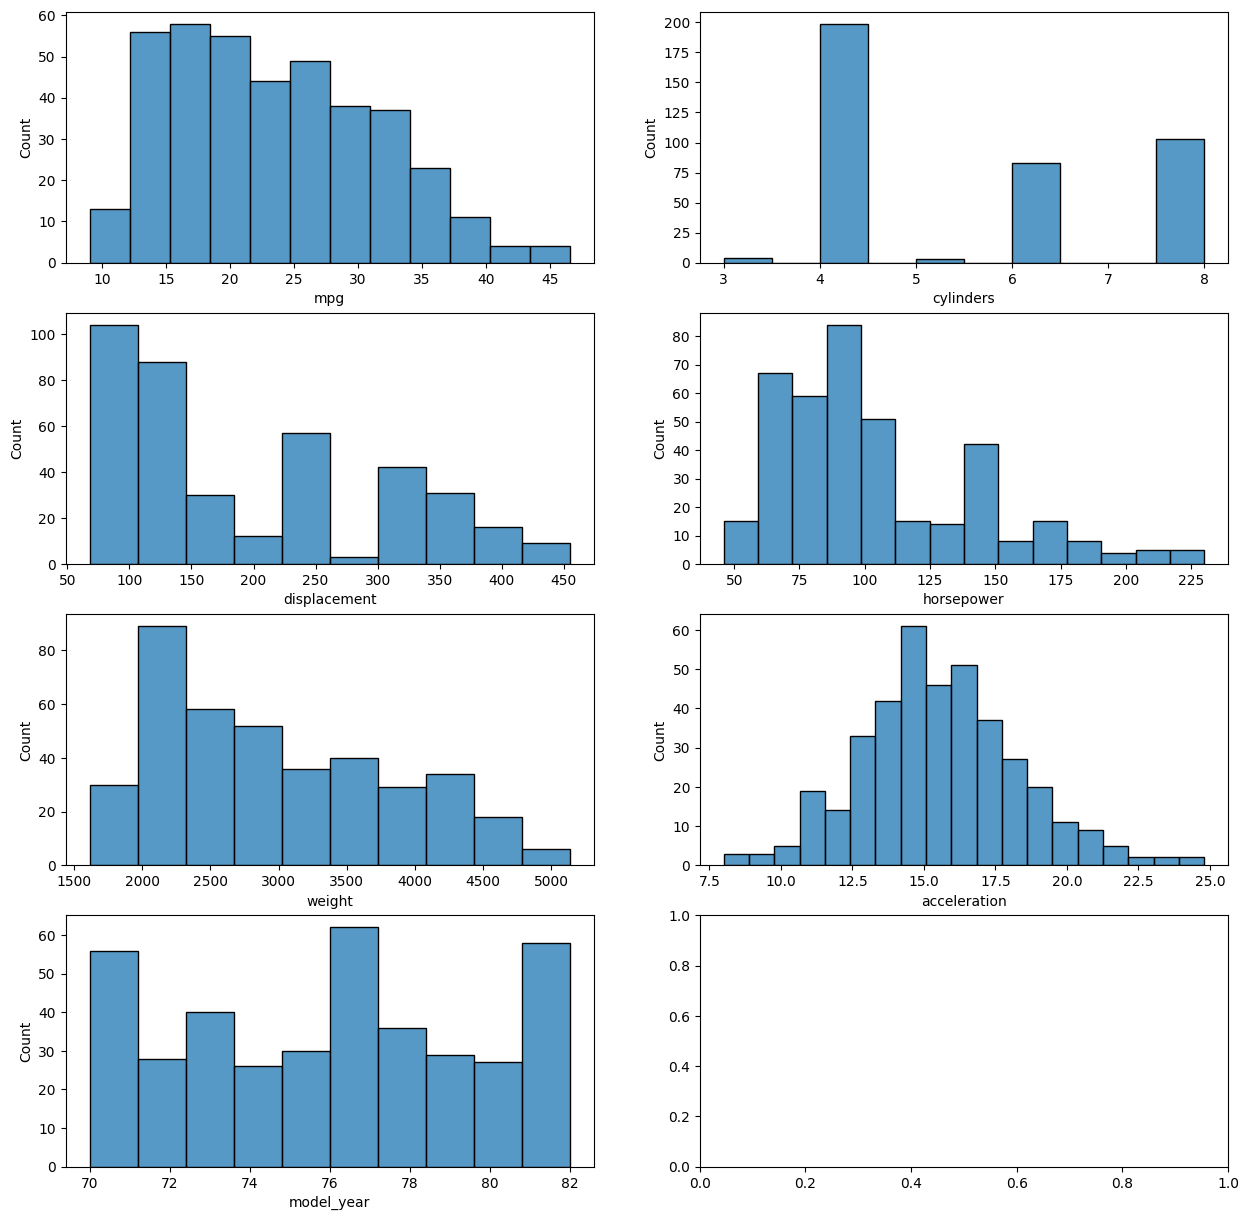

In [121]:
fig, ax = plt.subplots(4,2, figsize = (15,15))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax = ax[i])

# Train|test split

In [131]:
# creating X and y
X = df.drop("mpg", axis = "columns")
y = df["mpg"]
X.shape, y.shape

((392, 6), (392,))

In [135]:
from sklearn.model_selection import train_test_split

# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

# Function for evaluation

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


def eval_model(X_train, X_test, y_train, y_test, model):

    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_hat)
    mse = mean_squared_error(y_test, y_hat)
    rmse = np.sqrt(mse)
    return mae, mse, rmse


In [233]:
import pandas as pd

metrics = pd.DataFrame(index = ("MAE", "MSE", "RMSE"))

metrics["Linear regression (SVD solution to normal equation)"] = eval_model(X_train, X_test, y_train, y_test, LinearRegression())

In [234]:
# SVD with scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

metrics["Linear regression (SVD solution with Z-score scaling)"] = eval_model(scaled_X_train, scaled_X_test, y_train, y_test, LinearRegression())

In [235]:
# SGD
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(loss = "squared_error", max_iter = 1000)
metrics["Linear regression (SGD with Z-score scaling)"] = eval_model(scaled_X_train, scaled_X_test, y_train, y_test, model_SGD)
metrics


,Linear regression (SVD solution to normal equation),Linear regression (SVD solution with Z-score scaling),Linear regression (SGD with Z-score scaling)
MAE,2.503860,2.503860,2.540347
MSE,10.502370,10.502370,10.909040
RMSE,3.240736,3.240736,3.302884


In [266]:
# feature engineering for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# creates all polynomial combinations of x degrees
# help(PolynomialFeatures)

# 1 degree = linear
poly_features = PolynomialFeatures(degree = 1, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
print(X_poly.shape, X_train.shape)

poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
print(X_poly_train.shape, X_train.shape)
X_poly_test = poly_features.transform(X_test)

metrics["Polynomial regression (2 degrees))"] = eval_model(X_poly_train, X_poly_test, y_train, y_test, LinearRegression())

poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
print(X_poly_train.shape, X_train.shape)
X_poly_test = poly_features.transform(X_test)

metrics["Polynomial regression (3 degrees))"] = eval_model(X_poly_train, X_poly_test, y_train, y_test, LinearRegression())



(313, 6) (313, 6)
(313, 27) (313, 6)
(313, 83) (313, 6)


In [267]:
metrics

,Linear regression (SVD solution to normal equation),Linear regression (SVD solution with Z-score scaling),Linear regression (SGD with Z-score scaling),Polynomial regression (2 degrees)),Polynomial regression (3 degrees))
MAE,2.503860,2.503860,2.540347,1.980477,2.117878
MSE,10.502370,10.502370,10.909040,7.419858,9.273520
RMSE,3.240736,3.240736,3.302884,2.723942,3.045246
